<a href="https://colab.research.google.com/github/Tsaniyans/Project-Based-Intern---Data-Scientist-ID-X-Partners/blob/main/Final_Project_Tsaniya_Nur_Sukma_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Tsaniya Nur Sukma
# FINAL TASK ID/X PARTNERS

## BUSINESS UNDERSTANDING

### Problem Statement

The lending company wants to develop a credit risk prediction model using a data set of customer loans received and rejected by the company

### Goals
Building credit risk predictions that can minimize unpaid credit risk and increase the efficiency of operational lending companies in assessing credit applications

### Business Metric
- Accurancy
- Recall
- Precision
- F1 Score

### Business Objective
Build Machine Learning Model to predict Credit Risk


## Analytical Approach
Predictive Analytics

## Exploration Data Analyst

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_loan = pd.read_csv("D:/MAGANG IDX PARTNERS/Final Project/loan_data_2007_2014 .csv")
df_loan.head()

C:\Users\62895\AppData\Local\Temp\ipykernel_14396\506788079.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("D:/MAGANG IDX PARTNERS/Final Project/loan_data_2007_2014 .csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_loan.isnull().sum().sort_values

<bound method Series.sort_values of Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64>

terdapat banyak sekali data yang bernilai null, sehingga perlu dilakukannya pembersihan data agar data bisa diproses lebih efektif lagi

In [ ]:
df_loan.value_counts()

Unnamed: 0  id        member_id  loan_amnt  funded_amnt  funded_amnt_inv  term        int_rate  installment  grade  sub_grade  emp_title                  emp_length  home_ownership  annual_inc  verification_status  issue_d  loan_status  pymnt_plan  url                                                                    purpose             title                    zip_code  addr_state  dti    delinq_2yrs  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_d  last_pymnt_amnt  next_pymnt_d  last_credit_pull_d  collections_12_mths_ex_med  policy_code  application_type  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim
4           1075358   1311748    3000       3000         3000.0            60 months  12.69     67.79        B      B5         University Medical Group   1 

## Data Pre-Processing

In [ ]:
#Menghapus kolom yang banyak berisi NaN
missing_values_threshold = len(df_loan) * 0.5  # Batas nilai NaN yang diizinkan
df_loan2 = df_loan.dropna(axis=1, thresh=missing_values_threshold)
df_loan2.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


In [ ]:
df_loan2.fillna(df_loan2.median(), inplace=True)

C:\Users\62895\AppData\Local\Temp\ipykernel_14396\144102821.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_loan2.fillna(df_loan2.median(), inplace=True)


In [ ]:
df_loan2.isnull().sum().sort_values

<bound method Series.sort_values of Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
ea

In [ ]:
df_loan2 = pd.get_dummies(df_loan2, columns=['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 
                                             'initial_list_status', 'application_type'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_loan2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
          'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 
          'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 
          'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
          'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'acc_now_delinq','tot_coll_amt', 
          'tot_cur_bal', 'total_rev_hi_lim']] = scaler.fit_transform(df_loan2[['loan_amnt', 
                                                                               'funded_amnt', 'funded_amnt_inv', 
                                                                               'int_rate', 'installment', 'annual_inc', 
                                                                               'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 
                                                                               'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
                                                                               'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                                                                               'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 
                                                                               'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
                                                                               'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                                                                               'total_rev_hi_lim']])
df_loan2

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
0,0,1077501,1296599,-1.124392,-1.122963,-1.114455,36 months,-0.729587,-1.105575,NaN,...,0,0,0,0,0,0,0,1,0,1
1,1,1077430,1314167,-1.426088,-1.425101,-1.412732,60 months,0.330634,-1.528763,Ryder,...,0,0,0,0,0,0,0,1,0,1
2,2,1077175,1313524,-1.438156,-1.437186,-1.424784,36 months,0.488979,-1.428140,NaN,...,0,0,0,0,1,0,0,1,0,1
3,3,1076863,1277178,-0.521001,-0.518687,-0.508860,36 months,-0.077850,-0.380931,AIR RESOURCES BOARD,...,0,0,1,0,0,0,0,1,0,1
4,4,1075358,1311748,-1.365749,-1.364673,-1.352474,60 months,-0.261438,-1.496071,University Medical Group,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,0.492696,0.496497,0.503478,60 months,0.147046,0.002377,Financial Advisor,...,0,0,0,0,0,0,0,0,1,1
466281,466281,9684700,11536848,0.927137,0.931576,0.937336,60 months,1.409214,0.617856,Chief of Interpretation (Park Ranger),...,0,0,0,0,0,0,0,1,0,1
466282,466282,9584776,11436914,0.770256,0.774464,0.780665,60 months,0.725348,0.337921,patrol,...,0,0,0,0,0,0,0,1,0,1
466283,466283,9604874,11457002,-1.486427,-1.485528,-1.472991,36 months,-1.360671,-1.517427,Server Engineer Lead,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df_loan2.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL
count,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,4.662850e+05,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0
mean,233142.000000,1.307973e+07,1.459766e+07,-2.003446e-14,3.101207e-14,1.138314e-14,5.598189e-14,3.185789e-15,4.039616e-15,-5.036708e-16,...,0.009870,0.006421,0.050806,0.000753,0.015040,0.005334,0.005025,0.649828,0.350172,1.0
std,134605.029472,1.089371e+07,1.168237e+07,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,0.098854,0.079873,0.219601,0.027426,0.121713,0.072837,0.070708,0.477024,0.477024,0.0
min,0.000000,5.473400e+04,7.047300e+04,-1.667444e+00,-1.666811e+00,-1.714023e+00,-1.929794e+00,-1.710129e+00,-1.298709e+00,-2.193161e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,116571.000000,3.639987e+06,4.379705e+06,-7.623577e-01,-7.603971e-01,-7.498925e-01,-6.515623e-01,-7.202538e-01,-5.144761e-01,-7.462328e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,233142.000000,1.010790e+07,1.194108e+07,-2.796449e-01,-2.769761e-01,-2.678271e-01,-3.883712e-02,-2.142684e-01,-1.869847e-01,-4.442146e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,349713.000000,2.073121e+07,2.300154e+07,6.857808e-01,6.898657e-01,6.902779e-01,6.106056e-01,5.524720e-01,2.852032e-01,7.083381e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,466284.000000,3.809811e+07,4.086083e+07,2.495954e+00,2.502694e+00,2.504049e+00,2.806778e+00,4.016377e+00,1.351215e+02,2.900384e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


## Data Storytelling dan Data Visualization

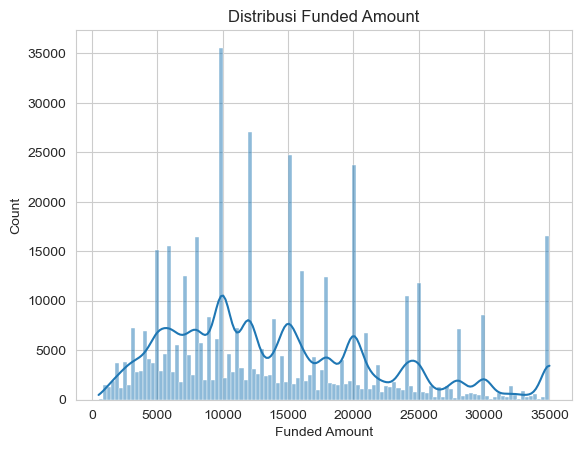

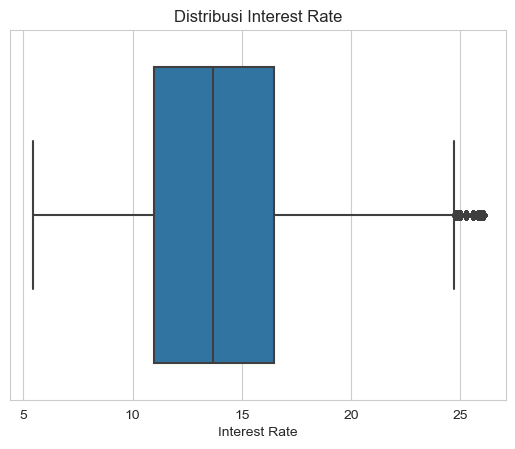

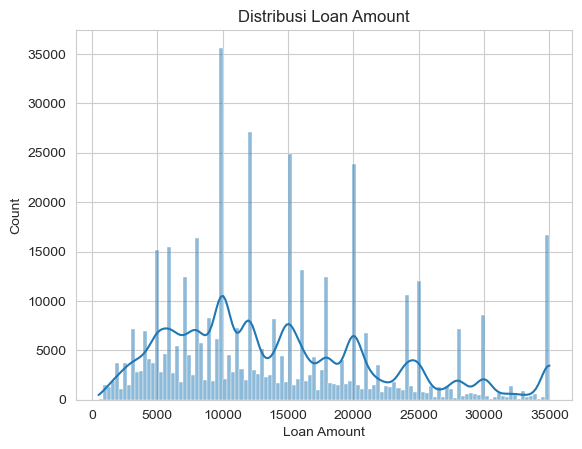

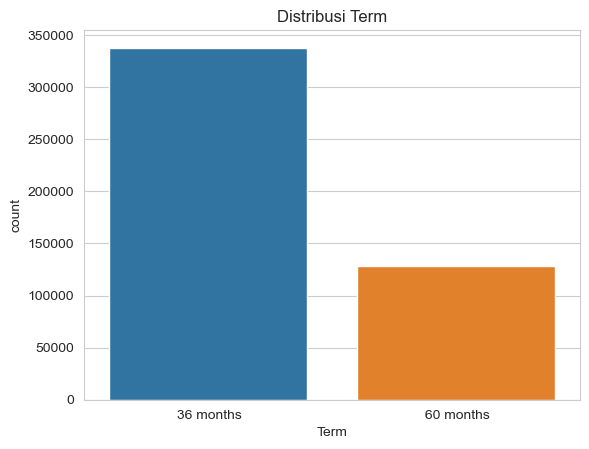

In [ ]:
# Menampilkan histogram dari kolom funded_amt
sns.histplot(data=df_loan, x="funded_amnt", kde=True)
plt.title("Distribusi Funded Amount")
plt.xlabel("Funded Amount")
plt.show()

# Menampilkan boxplot dari kolom int_rate
sns.boxplot(data=df_loan, x="int_rate")
plt.title("Distribusi Interest Rate")
plt.xlabel("Interest Rate")
plt.show()

# Menampilkan histogram dari kolom loan_amnt
sns.histplot(data=df_loan, x="loan_amnt", kde=True)
plt.title("Distribusi Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

# Menampilkan countplot dari kolom term
sns.countplot(data=df_loan, x="term")
plt.title("Distribusi Term")
plt.xlabel("Term")
plt.show()


Interpretasi dari bentuk grafik diatas yaitu :

1. Histogram pada kolom "funded_amnt" menunjukkan distribusi jumlah dana yang diberikan kepada peminjam, dimana mayoritas jumlah dana yang diberikan adalah di kisaran 5000 hingga 20000.

2. Boxplot pada kolom "int_rate" menunjukkan distribusi tingkat suku bunga pinjaman yang diberikan, dimana sebagian besar suku bunga berada di kisaran 10 hingga 16 persen dan terdapat beberapa data pencilan (outliers) yang berada di atas 20 persen.

3. Histogram pada kolom "loan_amnt" menunjukkan distribusi jumlah pinjaman yang diberikan, dimana mayoritas jumlah pinjaman adalah di kisaran 5000 hingga 20000.

4. Countplot pada kolom "term" menunjukkan distribusi jangka waktu pinjaman yang diberikan, dimana mayoritas peminjam memilih jangka waktu 36 bulan (3 tahun).

Distribusi dari masing-masing kolom ini dapat memberikan informasi penting bagi data scientist dalam membuat model prediksi risiko kredit, seperti memperkirakan probabilitas default pada suatu pinjaman atau memprediksi jumlah pinjaman yang akan disetujui.

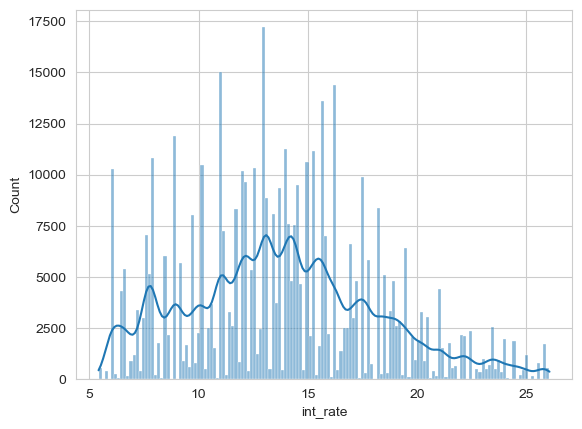

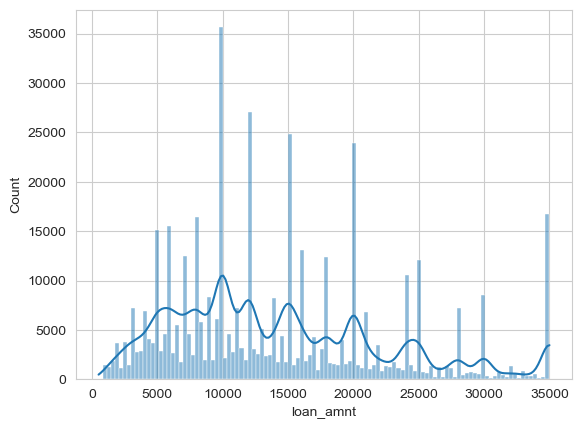

In [ ]:
# Membuat histogram dari kolom int_rate
sns.histplot(data=df_loan, x="int_rate", kde=True)
plt.show()

# Membuat histogram dari kolom loan_amnt
sns.histplot(data=df_loan, x="loan_amnt", kde=True)
plt.show()

Kita dapat melihat bahwa distribusi dari int_rate cenderung normal dengan sedikit skewness ke kanan. Sementara itu, distribusi dari loan_amnt cenderung lebih condong ke kanan. alam hal ini, kita dapat melihat sebaran jumlah pinjaman yang paling banyak dipinjamkan dan juga nilai ekstrim yang ada pada dataset.

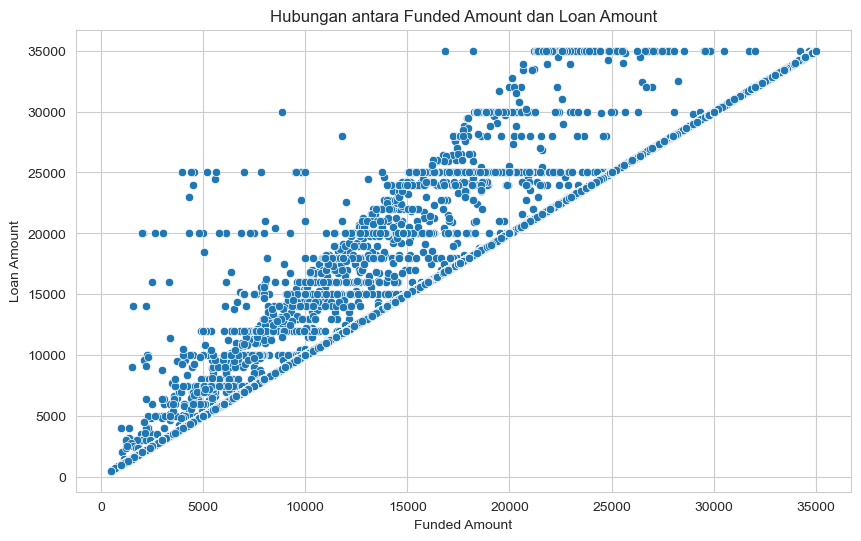

In [ ]:
#Hubungan antra funded_amnt dengan loan_amnt

sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
sns.scatterplot(x="funded_amnt", y="loan_amnt", data=df_loan)
plt.title("Hubungan antara Funded Amount dan Loan Amount")
plt.xlabel("Funded Amount")
plt.ylabel("Loan Amount")
plt.show()

Terlihat bahwa sebagian besar data berada pada garis diagonal yang menunjukkan bahwa jumlah pinjaman yang diminta hampir sama dengan jumlah dana yang diberikan. Namun, ada juga beberapa data yang terletak di bawah garis diagonal ini, yang menunjukkan bahwa peminjam mungkin tidak memperoleh seluruh pinjaman yang diminta. Selain itu, terdapat juga beberapa data yang terletak di atas garis diagonal ini, yang menunjukkan bahwa peminjam mungkin meminjam lebih dari jumlah yang diajukan. Plot tersebut memberikan gambaran yang baik tentang bagaimana dana dan pinjaman terkait satu sama lain dalam dataset.

## Model Algoritm yang dipilih

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\62895\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##Evaluation Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Charged Off', average='weighted')
recall = recall_score(y_test, y_pred, pos_label='Charged Off', average='weighted')
f1 = f1_score(y_test, y_pred, pos_label='Charged Off', average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


c:\Users\62895\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'Charged Off') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\62895\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\62895\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'Charged Off') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\62895\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'Charged Off') is

Accuracy: 0.4836098094513012
Precision: 0.5222892830771267
Recall: 0.4836098094513012
F1-Score: 0.31861869929718745


Dari hasil diatas nilai akurasi, presisi, recall, dan F1-score dari model klasifikasi yang telah dibuat berdasrkan business metric menunjukkan seberapa baik performa model dalam memprediksi target label dari data uji, di mana semakin besar nilai-nilai tersebut, semakin baik performa model tersebut. 

Dalam kasus tersebut, nilai akurasi sebesar 0.48 menunjukkan bahwa model tersebut memiliki tingkat keakuratan yang rendah dalam memprediksi target label dari data uji. Sedangkan nilai presisi, recall, dan F1-score menunjukkan performa model pada kelas 'Charged Off', di mana nilai presisi sebesar 0.52 menunjukkan bahwa dari seluruh prediksi kelas 'Charged Off', sekitar 52% prediksi tersebut benar-benar termasuk ke dalam kelas 'Charged Off'. Sedangkan nilai recall sebesar 0.48 menunjukkan bahwa dari seluruh data kelas 'Charged Off', hanya sekitar 48% data tersebut yang berhasil diprediksi dengan benar oleh model. Nilai F1-score yang rendah sebesar 0.31 menunjukkan bahwa performa model dalam memprediksi kelas 'Charged Off' masih perlu ditingkatkan.